In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

## The Reuters dataset

[link text](https://)

In [0]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.datasets import reuters
from keras.preprocessing import sequence




Like with the IMDB dataset, the argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the 
data.

We have 8,982 training examples and 2,246 test examples:

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

## Preparing the data
We are limiting the maximum length of the newswire to 700 words.

In [0]:
word_length = 700

In [0]:
train_data = sequence.pad_sequences(train_data, maxlen=word_length)
test_data = sequence.pad_sequences(test_data, maxlen=word_length)

In [0]:
from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels, 46)
test_labels = np_utils.to_categorical(test_labels, 46)

## Building our network
### Stacking RNNs increasing number of units adding dense layers

Here, we will be creating complex network using LSTM and Dense flavor of RNNs.
Here, we use 3 LSTM with 128 units each & 3 Dense layers of 512 units. Optimizer used is rmsprop using and loss is categorical cross entropy. Metrics used to evaluate is accuracy. We use 70-30 split for cross validation.


In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

high_unit_stacked_lstm_dense = Sequential()
high_unit_stacked_lstm_dense.add(Embedding(10000, 64))
high_unit_stacked_lstm_dense.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm_dense.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm_dense.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2))
high_unit_stacked_lstm_dense.add(layers.Dense(512, activation='relu'))
high_unit_stacked_lstm_dense.add(layers.Dense(512, activation='relu'))
high_unit_stacked_lstm_dense.add(layers.Dense(46,activation='softmax'))

high_unit_stacked_lstm_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = high_unit_stacked_lstm_dense.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6287 samples, validate on 2695 samples
Epoch 1/30





6287/6287 [==============================] - 415s 66ms/step - loss: 10.0884 - acc: 0.3391 - val_loss: 10.4244 - val_acc: 0.3532
Epoch 2/30
6287/6287 [==============================] - 416s 66ms/step - loss: 10.4600 - acc: 0.3510 - val_loss: 10.4244 - val_acc: 0.3532
Epoch 3/30
6287/6287 [==============================] - 414s 66ms/step - loss: 10.4600 - acc: 0.3510 - val_loss: 10.4244 - val_acc: 0.3532
Epoch 4/30
6287/6287 [==============================] - 414s 66ms/step - loss: 10.4600 - acc: 0.3510 - val_loss: 10.4244 - val_acc: 0.3532
Epoch 5/30
6287/6287 [==============================] - 420s 67ms/step - loss: 10.4600 - acc: 0.3510 - val_loss: 10.4244 - val_acc: 0.3532
Epoch 6/30
6287/6287 [============

In [0]:
high_unit_stacked_lstm_dense.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 46)               

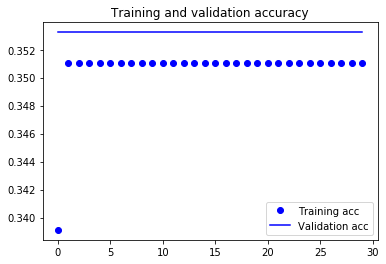

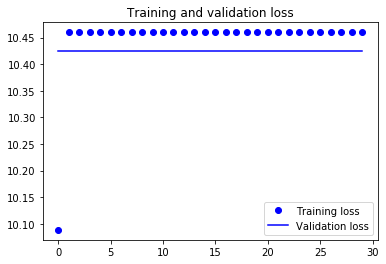

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This plot indicates that network does not learn using with current data as accuarcy and loss never changes significantly.

In [0]:


high_unit_stacked_lstm_dense = Sequential()
high_unit_stacked_lstm_dense.add(Embedding(10000, 64))
high_unit_stacked_lstm_dense.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm_dense.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm_dense.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2))
high_unit_stacked_lstm_dense.add(layers.Dense(512, activation='relu'))
high_unit_stacked_lstm_dense.add(layers.Dense(512, activation='relu'))
high_unit_stacked_lstm_dense.add(layers.Dense(46,activation='softmax'))

high_unit_stacked_lstm_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = high_unit_stacked_lstm_dense.fit(train_data, train_labels,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.3)
results = high_unit_stacked_lstm_dense.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/5
6287/6287 [==============================] - 411s 65ms/step - loss: 11.7053 - acc: 0.2222 - val_loss: 12.5476 - val_acc: 0.2215
Epoch 2/5
6287/6287 [==============================] - 411s 65ms/step - loss: 12.6520 - acc: 0.2150 - val_loss: 12.5476 - val_acc: 0.2215
Epoch 3/5
6287/6287 [==============================] - 413s 66ms/step - loss: 12.6520 - acc: 0.2150 - val_loss: 12.5476 - val_acc: 0.2215
Epoch 4/5
6287/6287 [==============================] - 416s 66ms/step - loss: 12.6520 - acc: 0.2150 - val_loss: 12.5476 - val_acc: 0.2215
Epoch 5/5
2246/2246 [==============================] - 39s 17ms/step


In [0]:
results

[12.71650271190667, 0.21104185218165628]

### Observation:
The loss of this network is 12.7 which is extremely high and accuracy is low 0.2. This multi layered network may require more data to train. Hence, we would try thin 1-2 layered networks from next iteration.

## Changing the learning rate of rmsprop

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras import optimizers

learning_rate_change_model = Sequential()
learning_rate_change_model.add(Embedding(10000, 64))
learning_rate_change_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
learning_rate_change_model.add(layers.Dense(46,activation='softmax'))

learning_rate_change_model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = learning_rate_change_model.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 51s 8ms/step - loss: 3.8079 - acc: 0.2617 - val_loss: 3.7886 - val_acc: 0.3603
Epoch 2/30
6287/6287 [==============================] - 48s 8ms/step - loss: 3.7617 - acc: 0.3711 - val_loss: 3.7230 - val_acc: 0.3852
Epoch 3/30
6287/6287 [==============================] - 48s 8ms/step - loss: 3.6340 - acc: 0.3137 - val_loss: 3.4833 - val_acc: 0.2275
Epoch 4/30
6287/6287 [==============================] - 49s 8ms/step - loss: 3.3245 - acc: 0.2613 - val_loss: 3.1002 - val_acc: 0.2215
Epoch 5/30
6287/6287 [==============================] - 50s 8ms/step - loss: 3.0421 - acc: 0.2292 - val_loss: 2.8933 - val_acc: 0.2215
Epoch 6/30
6287/6287 [==============================] - 50s 8ms/step - loss: 2.8597 - acc: 0.2246 - val_loss: 2.7539 - val_acc: 0.2215
Epoch 7/30
6287/6287 [==============================] - 50s 8ms/step - loss: 2.7318 - acc: 0.2263 - val_loss: 2.6490 - val_acc: 0.2215
Epoch 8

In [0]:
learning_rate_change_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_7 (Dense)              (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________


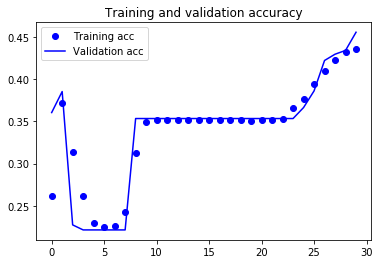

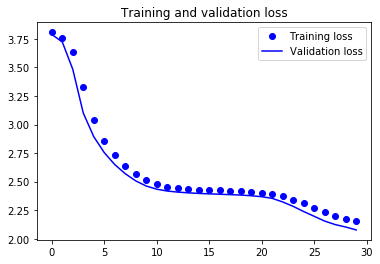

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Observation: 
Here, clearly the validation accuracy and training accuracy follow training accuracy very closely. This mandates that we can continue for few more epochs.

In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras import optimizers

learning_rate_change_model = Sequential()
learning_rate_change_model.add(Embedding(10000, 64))
learning_rate_change_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
learning_rate_change_model.add(layers.Dense(46,activation='softmax'))

learning_rate_change_model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = learning_rate_change_model.fit(train_data, train_labels,
                    epochs=180,
                    batch_size=128,
                    validation_split=0.3)


Train on 6287 samples, validate on 2695 samples
Epoch 1/180
6287/6287 [==============================] - 53s 8ms/step - loss: 3.8098 - acc: 0.3019 - val_loss: 3.7898 - val_acc: 0.3532
Epoch 2/180
6287/6287 [==============================] - 50s 8ms/step - loss: 3.7653 - acc: 0.3510 - val_loss: 3.7304 - val_acc: 0.3532
Epoch 3/180
6287/6287 [==============================] - 50s 8ms/step - loss: 3.6691 - acc: 0.3510 - val_loss: 3.5682 - val_acc: 0.3532
Epoch 4/180
6287/6287 [==============================] - 50s 8ms/step - loss: 3.3116 - acc: 0.3510 - val_loss: 2.9152 - val_acc: 0.3532
Epoch 5/180
6287/6287 [==============================] - 50s 8ms/step - loss: 2.8720 - acc: 0.3510 - val_loss: 2.6855 - val_acc: 0.3532
Epoch 6/180
6287/6287 [==============================] - 50s 8ms/step - loss: 2.6897 - acc: 0.3510 - val_loss: 2.5941 - val_acc: 0.3532
Epoch 7/180
6287/6287 [==============================] - 50s 8ms/step - loss: 2.6047 - acc: 0.3510 - val_loss: 2.5396 - val_acc: 0.3532


#### Plotting the training/validation accuracy and loss.

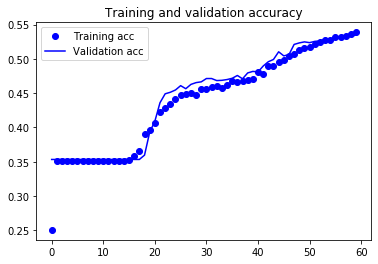

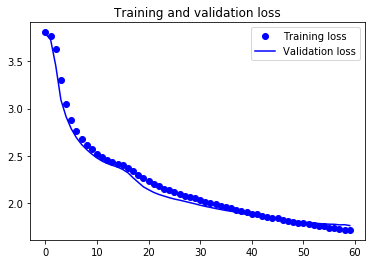

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
results = learning_rate_change_model.evaluate(test_data, test_labels)
results

[2.047542837827416, 0.4919857524487979]

### Conclusions